## Notebook Setup

In [ ]:
#!pip install wordcloud

#or

#import sys
#print(sys.executable)

#in terminal
#/path/to/python -m pip install wordcloud
#Replace /path/to/python with the path printed by sys.executable


zsh:1: /Users/roshni/Desktop/DrParmar_Project/owml_project/owml/bin/pip: bad interpreter: /Users/roshni/owml_project/owml/bin/python3.12: no such file or directory


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')                          # only needs to run once
stop_words = set(stopwords.words('english'))        # Create a set of English stopwords for filtering out common words


BASE_DIR = "/Users/roshni/Desktop/DrParmar_Project/owml_project"
DATA_DIR = f"{BASE_DIR}/data"


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roshni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Cleaned Datasets

In [4]:
CoAID = pd.read_csv(f"{DATA_DIR}/CoAID_Cleaned.csv")
FakeNewsNet = pd.read_csv(f"{DATA_DIR}/FakeNewsNet_cleaned.csv")
WELFake = pd.read_csv(f"{DATA_DIR}/WELFake_Cleaned.csv")

print("CoAID shape:", CoAID.shape)
print("FakeNewsNet shape:", FakeNewsNet.shape)
print("WELFake shape:", WELFake.shape)

CoAID shape: (3079, 2)
FakeNewsNet shape: (228, 2)
WELFake shape: (63678, 2)


## Data Exploration Function

In [5]:
def get_top_words(texts, n=20):                                                           # to get Top words
    all_words = ' '.join(texts).split()                                                   # Join all text entries into a single string and split into words   
    words = [w.lower() for w in all_words if w.isalpha() and w.lower() not in stop_words] # filter out non-alphabetic words and stopwords
    return Counter(words).most_common(n)


def plot_wordcloud(text, title):                                                          # to plot WordCloud to visualize most frequent words
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text)) 
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


## Exploratory Data Analysis (EDA) for Each Dataset

In [14]:
for df in [CoAID, FakeNewsNet, WELFake]:
    df['text'] = df['text'].fillna('').astype(str)  # Replace NaN or missing entries with empty strings

### 1) CoAID Dataset

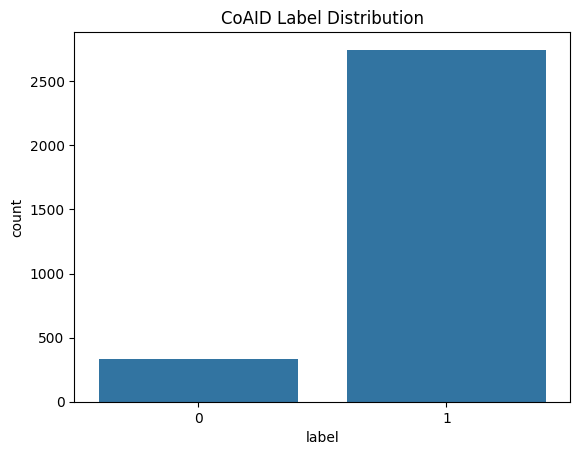

In [15]:
sns.countplot(x='label', data=CoAID)                                                        # Plotting the label distribution for CoAID dataset
plt.title("CoAID Label Distribution") 
plt.show()

CoAID['text_length'] = CoAID['text'].apply(len)                                             # Calculating length of each news text for CoAID dataset






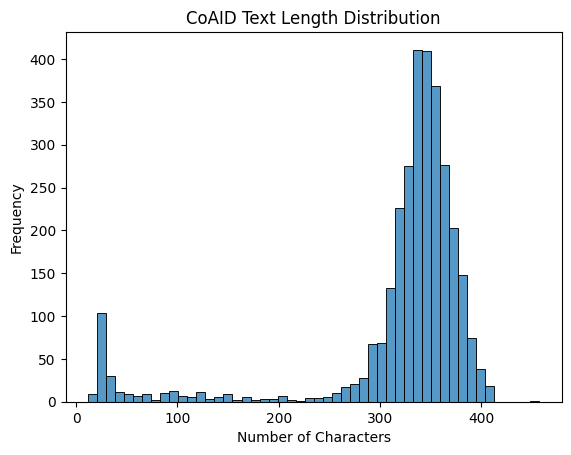

In [16]:
sns.histplot(CoAID['text_length'], bins=50) 
plt.title("CoAID Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [17]:
print("Top words - Real news (CoAID):", get_top_words(CoAID[CoAID['label']==1]['text']))    # Getting top words for Real news in CoAID dataset
print("Top words - Fake news (CoAID):", get_top_words(CoAID[CoAID['label']==0]['text']))    # Getting top words for Fake news in CoAID dataset


Top words - Real news (CoAID): [('covid', 3476), ('coronavirus', 1273), ('people', 1202), ('health', 1174), ('may', 1117), ('data', 1103), ('new', 945), ('disease', 807), ('information', 773), ('pandemic', 767), ('virus', 707), ('time', 705), ('based', 625), ('state', 614), ('case', 610), ('expert', 600), ('say', 594), ('available', 587), ('patient', 576), ('risk', 545)]
Top words - Fake news (CoAID): [('see', 138), ('coronavirus', 132), ('facebook', 132), ('covid', 53), ('virus', 48), ('health', 47), ('president', 45), ('new', 41), ('people', 40), ('state', 37), ('trump', 36), ('death', 36), ('world', 33), ('china', 32), ('vaccine', 31), ('time', 28), ('said', 28), ('nt', 28), ('case', 28), ('pandemic', 26)]


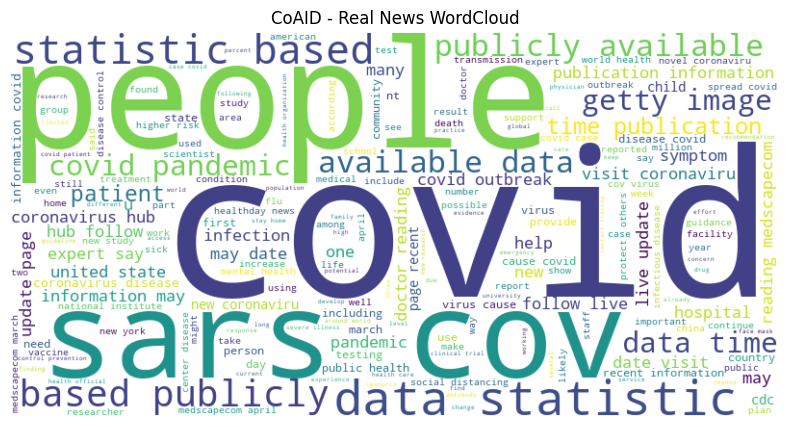

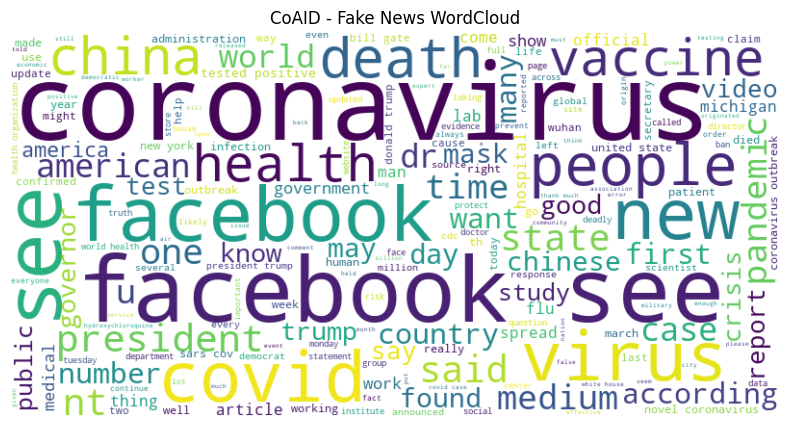

In [18]:
plot_wordcloud(CoAID[CoAID['label']==1]['text'], "CoAID - Real News WordCloud")             # to plot WordCloud for Real news in CoAID dataset
plot_wordcloud(CoAID[CoAID['label']==0]['text'], "CoAID - Fake News WordCloud")             # to plot WordCloud for Fake news in CoAID dataset


### 2) FakeNewsNet Dataset

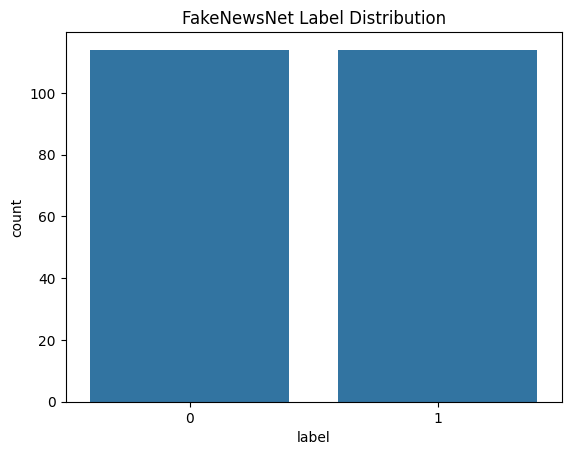

In [19]:
sns.countplot(x='label', data=FakeNewsNet)
plt.title("FakeNewsNet Label Distribution")
plt.show()

FakeNewsNet['text_length'] = FakeNewsNet['text'].apply(len)         # Calculating length of each news text for FakeNewsNet dataset






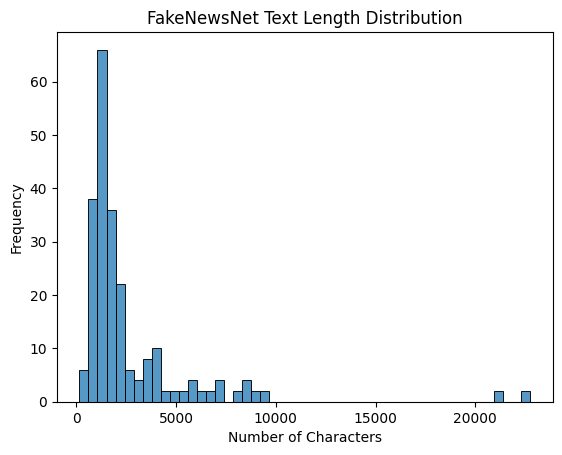

In [20]:
sns.histplot(FakeNewsNet['text_length'], bins=50)
plt.title("FakeNewsNet Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [21]:
print("Top words - Real news (FakeNewsNet):", get_top_words(FakeNewsNet[FakeNewsNet['label']==1]['text']))
print("Top words - Fake news (FakeNewsNet):", get_top_words(FakeNewsNet[FakeNewsNet['label']==0]['text']))


Top words - Real news (FakeNewsNet): [('trump', 585), ('said', 396), ('clinton', 310), ('state', 196), ('new', 196), ('would', 192), ('u', 180), ('president', 172), ('one', 170), ('debate', 161), ('donald', 153), ('people', 153), ('say', 148), ('campaign', 148), ('republican', 143), ('also', 126), ('year', 123), ('obama', 119), ('american', 112), ('first', 105)]
Top words - Fake news (FakeNewsNet): [('trump', 585), ('said', 396), ('clinton', 310), ('state', 196), ('new', 196), ('would', 192), ('u', 180), ('president', 172), ('one', 170), ('debate', 161), ('donald', 153), ('people', 153), ('say', 148), ('campaign', 148), ('republican', 143), ('also', 126), ('year', 123), ('obama', 119), ('american', 112), ('first', 105)]


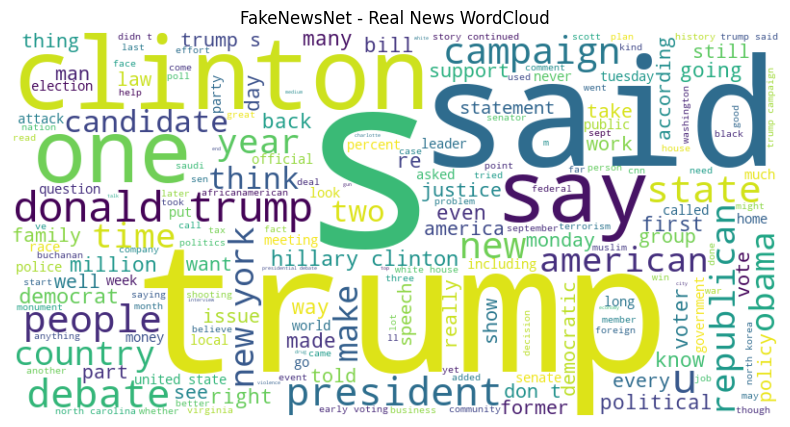

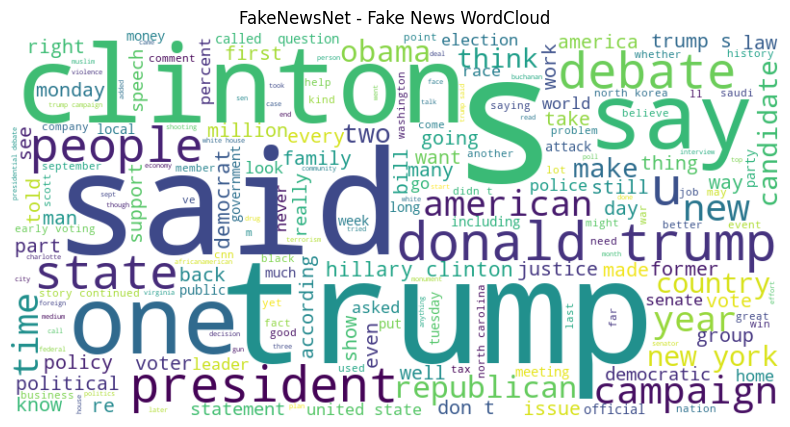

In [22]:
plot_wordcloud(FakeNewsNet[FakeNewsNet['label']==1]['text'], "FakeNewsNet - Real News WordCloud")
plot_wordcloud(FakeNewsNet[FakeNewsNet['label']==0]['text'], "FakeNewsNet - Fake News WordCloud")


### 3) WELFake Dataset

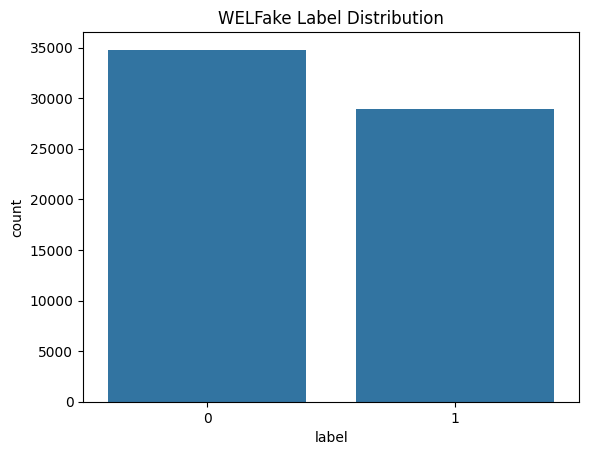

In [23]:
sns.countplot(x='label', data=WELFake)
plt.title("WELFake Label Distribution")
plt.show()

WELFake['text_length'] = WELFake['text'].apply(len)       # Calculating length of each news text for WELFake dataset



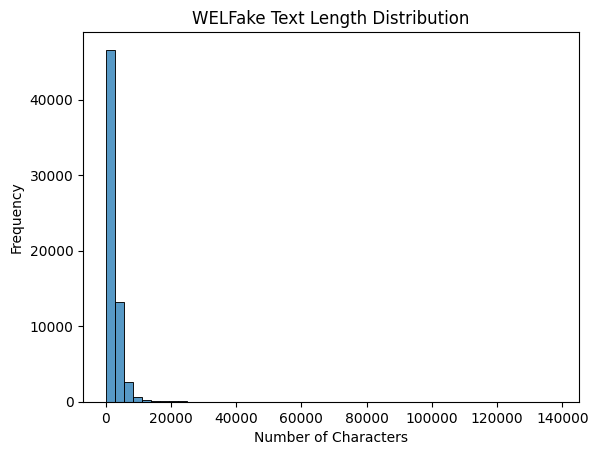

In [24]:
sns.histplot(WELFake['text_length'], bins=50)
plt.title("WELFake Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()



In [25]:
print("Top words - Real news (WELFake):", get_top_words(WELFake[WELFake['label']==1]['text']))
print("Top words - Fake news (WELFake):", get_top_words(WELFake[WELFake['label']==0]['text']))



Top words - Real news (WELFake): [('trump', 89476), ('people', 37838), ('u', 37056), ('said', 35560), ('one', 35305), ('would', 33556), ('clinton', 32709), ('state', 31428), ('president', 28707), ('time', 26356), ('like', 25527), ('hillary', 23831), ('american', 22676), ('year', 22333), ('new', 22091), ('also', 21700), ('donald', 21408), ('obama', 20792), ('even', 20470), ('say', 19889)]
Top words - Fake news (WELFake): [('said', 183254), ('trump', 91017), ('mr', 70696), ('state', 66023), ('would', 61932), ('u', 60617), ('new', 49576), ('president', 48095), ('year', 44259), ('one', 42063), ('republican', 39447), ('people', 39366), ('time', 37538), ('also', 36348), ('house', 30402), ('government', 30209), ('could', 29772), ('say', 28543), ('reuters', 28397), ('united', 27520)]


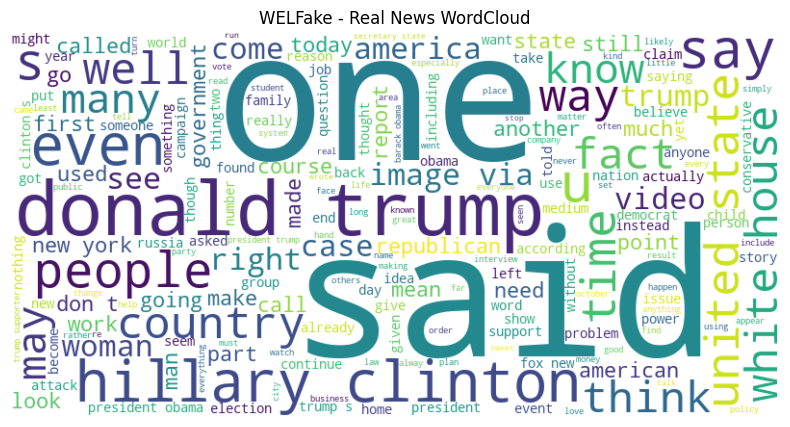

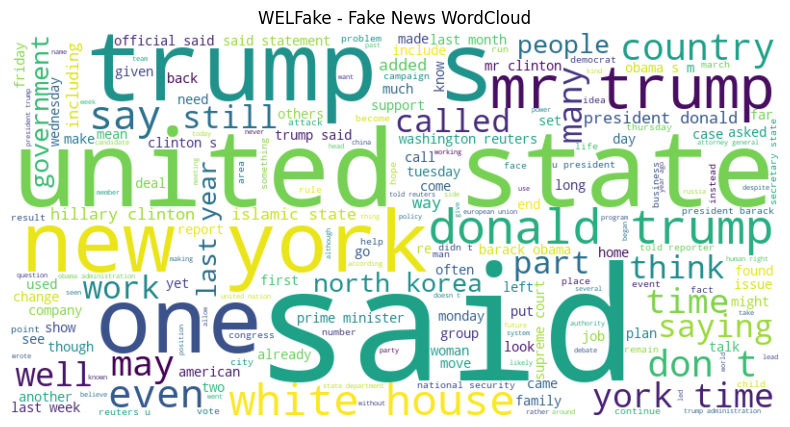

In [26]:
plot_wordcloud(WELFake[WELFake['label']==1]['text'], "WELFake - Real News WordCloud")
plot_wordcloud(WELFake[WELFake['label']==0]['text'], "WELFake - Fake News WordCloud")